## Imported Packages

In [8]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, folium, geoplot as gplt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

## Reading csv files

In [9]:
# importing the datasets

train_data= pd.read_csv("../Data/train.csv")
test_data= pd.read_csv("../Data/test.csv")


## Basic Data Overview

In [10]:
train_data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


## Summary Statistics

In [11]:
train_data.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

### which year has the highest carbon emission?

In [13]:
grouped_year_data= train_data.groupby("year").sum()
grouped_year_data

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
year,,,,,,,,,,,,,,,,,,,,,
2019,ID_-0.510_29.290_2019_00ID_-0.510_29.290_2019_...,-49812.739,787073.161,684866,0.720396,20140.478518,0.533378,3732.092790,-240071.206132,894382.400880,...,1.429913e+08,1.534304e+09,1.200942e+08,558906.177117,7205.781684,-276199.161015,1.054539e+06,-2.279838e+06,730971.920879,2.298392e+06
2020,ID_-0.510_29.290_2020_00ID_-0.510_29.290_2020_...,-49812.739,787073.161,684866,1.758055,18063.065094,1.293613,3455.388483,-259103.040072,784751.593036,...,1.458691e+08,1.577151e+09,1.216954e+08,487859.611497,7206.093762,-298962.681143,1.058116e+06,-2.267035e+06,731054.717890,2.001708e+06
2021,ID_-0.510_29.290_2021_00ID_-0.510_29.290_2021_...,-49812.739,787073.161,684866,0.605826,15572.339413,0.430642,3016.828837,-11362.754172,732280.691723,...,1.503594e+08,1.555355e+09,1.250213e+08,456411.053165,6908.301417,-271868.083622,1.063224e+06,-2.270358e+06,731252.013273,2.175087e+06


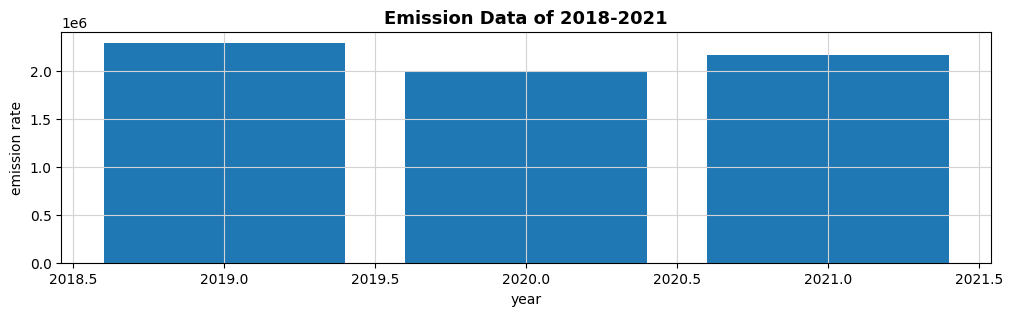

In [14]:
year= train_data["year"].unique()

plt.figure(figsize=(12, 3))

plt.title("Emission Data of 2018-2021", fontdict={"fontsize": "13", "fontweight": "bold"})
plt.grid(True, color= "lightgray")

plt.xlabel("year")
plt.ylabel("emission rate")

plt.bar(year, grouped_year_data["emission"])

plt.show()

## Basic Data Analysis and Catagorization

### What is the Distribution of CarbonMonoxide along different latitudes?

In [15]:
# grouping data by latitude ranges

grouped_latitude_data= train_data.groupby("latitude").sum()
grouped_latitude_data.head(4)

,ID_LAT_LON_YEAR_WEEK,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
latitude,,,,,,,,,,,,,,,,,,,,,
-3.299,ID_-3.299_30.301_2019_00ID_-3.299_30.301_2019_...,4817.859,321180,4134,0.000426,127.532009,0.000633,22.869903,-199.008787,5126.485250,...,810714.861200,1.003165e+07,667071.710934,2681.565555,40.907580,-2113.177788,6549.346542,-13494.875210,4479.095294,4393.694938
-3.287,ID_-3.287_29.713_2019_00ID_-3.287_29.713_2019_...,4724.367,321180,4134,0.003026,120.571081,0.002824,21.094773,-1256.287989,5316.895329,...,848277.153063,9.743197e+06,703101.192697,2930.681407,44.289830,-2178.944667,6215.538893,-13534.211071,4485.381174,6690.351773
-3.174,ID_-3.174_29.926_2019_00ID_-3.174_29.926_2019_...,4758.234,321180,4134,0.000797,114.914160,0.000430,20.291372,-1801.215872,4801.876113,...,843414.824176,9.779086e+06,697551.184268,2891.561517,42.984429,-2168.840667,6195.589095,-13470.596158,4487.376754,7128.342002
-3.161,ID_-3.161_28.839_2019_00ID_-3.161_28.839_2019_...,4585.401,321180,4134,0.010859,104.254882,0.007515,22.663410,3259.622085,5293.268921,...,742759.215603,1.023582e+07,621193.270268,2764.236468,39.882303,-1773.699487,6564.590688,-13527.172002,4463.750990,20.003610


In [16]:
grouped_latitude_data["emission"].shape


(452,)

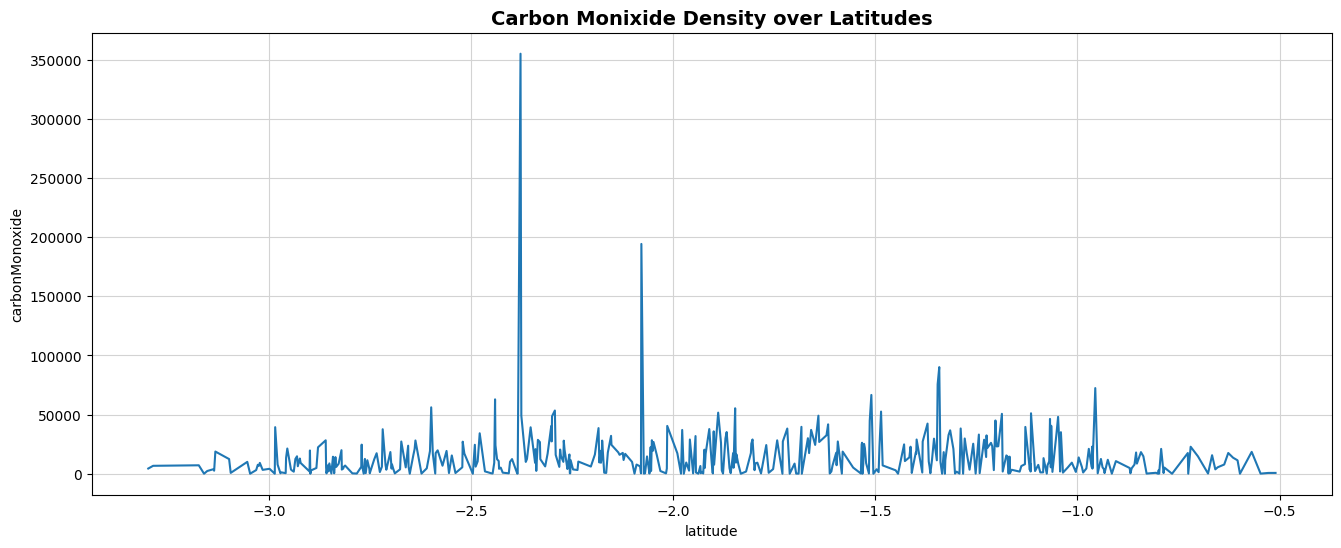

In [17]:
# data visualization

plt.figure(figsize=(16, 6))
plt.title("Carbon Monixide Density over Latitudes", fontdict={"fontweight": "bold", "fontsize": "14"})

plt.grid(True, color="lightgray")

plt.ylabel("carbonMonoxide")
plt.xlabel("latitude")

plt.plot(grouped_latitude_data["emission"])


plt.show()

# Data Cleansing

### Cleaning Data

In [18]:
# drop unnecessary columns

train_data= train_data.drop(columns= "ID_LAT_LON_YEAR_WEEK")
train_data= train_data.drop(columns= ["UvAerosolLayerHeight_aerosol_height", "UvAerosolLayerHeight_aerosol_pressure", "UvAerosolLayerHeight_aerosol_optical_depth", "UvAerosolLayerHeight_sensor_zenith_angle", "UvAerosolLayerHeight_sensor_azimuth_angle", "UvAerosolLayerHeight_solar_azimuth_angle", "UvAerosolLayerHeight_solar_zenith_angle"])


In [19]:
train_data.head(0)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission


### Dropping nan values

In [20]:
train_data= train_data.dropna(how="any")
train_data.shape

(57209, 68)

### Annual Emission Data

In [21]:
emission_2019= train_data.loc[train_data["year"]==2019]["emission"]
emission_2020= train_data.loc[train_data["year"]==2020]["emission"]
emission_2021= train_data.loc[train_data["year"]==2021]["emission"]


In [22]:
print({"2019 length": len(emission_2019.unique()), "2020 length": len(emission_2020.unique()), "2021 length": len(emission_2021.unique())})

{'2019 length': 19094, '2020 length': 18604, '2021 length': 18248}


In [23]:
emission_2019= emission_2019.unique()
emission_2020= emission_2020.unique()
emission_2021= emission_2021.unique()

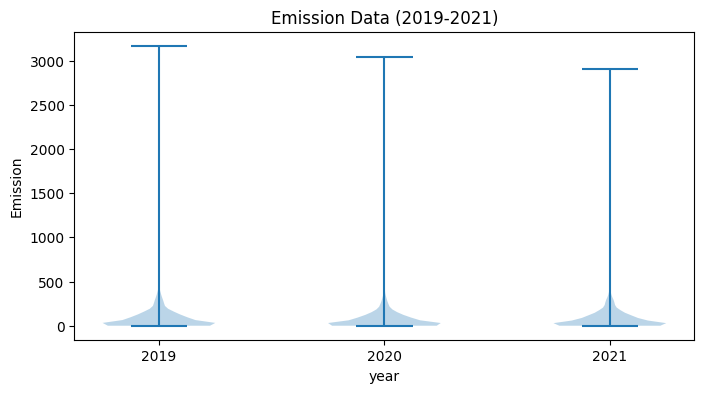

In [24]:
plt.figure(figsize=(8,4))

plt.title("Emission Data (2019-2021)")

plt.violinplot([emission_2019, emission_2020, emission_2021])

plt.xticks([1,2,3], ["2019", "2020", "2021"])
plt.ylabel("Emission")
plt.xlabel("year")
plt.show()


#### Conclusion
##### As we can see from the above graph, the emission values of the years 2019 upto 2021 is almost the same.

# Weekly emission Analysis and prediction

In [25]:
# grouping average of weekly data

grouped_week_data= train_data.groupby("week_no").mean()
grouped_week_data.describe()

,latitude,longitude,year,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,-1.896736,29.912294,2019.982597,0.000047,0.831517,0.000034,0.149782,-9.395581,36.961117,-86.475516,...,5483.373546,60134.521543,4579.528450,17.580537,0.269200,-10.551771,40.231314,-86.760016,27.904934,82.619135
std,0.042313,0.058511,0.126423,0.000045,0.073568,0.000034,0.012083,19.045381,3.559645,38.174570,...,798.194198,5292.190495,760.030855,4.866549,0.029200,7.959306,2.040979,38.099387,4.021373,12.617205
min,-2.000203,29.705396,2019.521678,-0.000088,0.671473,-0.000067,0.122808,-52.242047,28.438723,-141.683677,...,3923.739371,53576.665535,3108.127236,8.468154,0.215871,-28.366214,34.740221,-139.520807,20.256391,64.578425
25%,-1.919612,29.884910,2019.934466,0.000019,0.777748,0.000013,0.140674,-18.637834,34.495637,-126.123071,...,4672.615545,55809.913379,3774.242487,13.191256,0.251454,-15.834964,38.742412,-126.002709,24.510695,74.153756
50%,-1.890016,29.920338,2019.988556,0.000043,0.840734,0.000034,0.148798,-8.109517,36.374044,-85.570805,...,5692.854401,57895.555926,4778.948155,17.773096,0.269676,-9.710743,40.367886,-86.101712,28.484894,79.788308
75%,-1.872857,29.943532,2020.038081,0.000067,0.890678,0.000046,0.158811,1.559855,39.354614,-47.761296,...,6133.876112,65075.077148,5174.741845,21.209359,0.293604,-4.827962,41.290781,-48.865957,31.761192,85.735498
max,-1.758912,30.044068,2020.309231,0.000197,0.970907,0.000145,0.174718,40.393218,46.200751,-36.222447,...,6628.043463,71311.840102,5706.604242,28.713226,0.321109,5.661426,44.836324,-37.555575,33.851637,119.734578


### Visualized weekly emission data

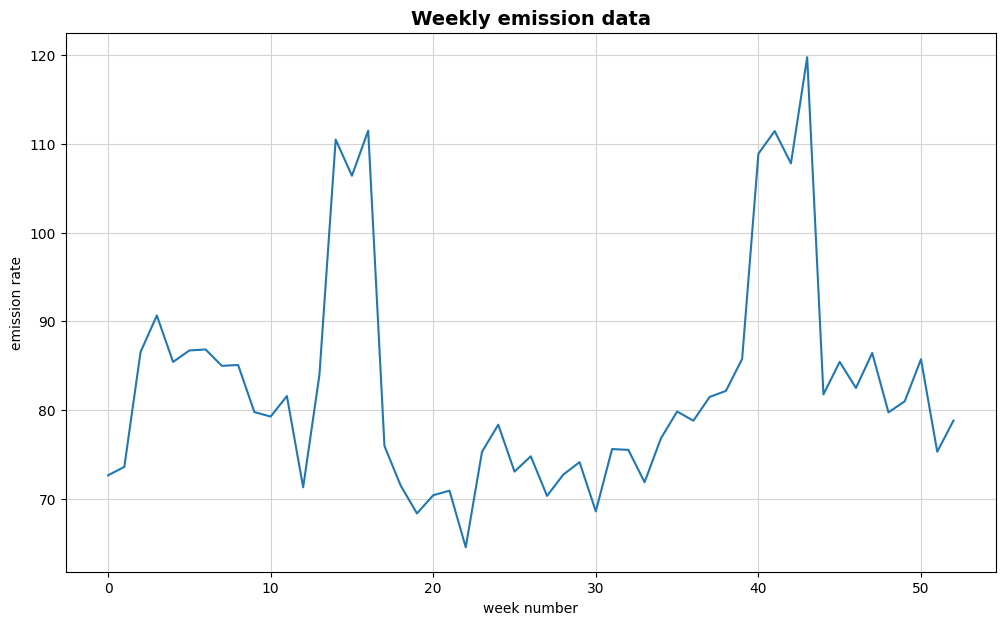

In [26]:
plt.figure(figsize=(12,7))

plt.title("Weekly emission data", fontdict={"fontweight": "bold", "fontsize": "14"})

plt.grid(True, color="lightgray")

plt.xlabel("week number")
plt.ylabel("emission rate")

plt.plot(grouped_week_data["emission"])
plt.show()

# Weekly emission Analysis and Prediction on Merged data (2019-2022)

### Cleaning the test.csv Data

In [27]:
test_data= test_data.drop(columns= ["ID_LAT_LON_YEAR_WEEK", "UvAerosolLayerHeight_aerosol_height", "UvAerosolLayerHeight_aerosol_pressure"
                                    , "UvAerosolLayerHeight_aerosol_optical_depth", "UvAerosolLayerHeight_sensor_zenith_angle"
                                    , "UvAerosolLayerHeight_sensor_azimuth_angle", "UvAerosolLayerHeight_solar_azimuth_angle"
                                    , "UvAerosolLayerHeight_solar_zenith_angle"])

In [28]:
test_data=test_data.dropna(how="any")
test_data.shape

(17095, 67)

### Merging the two csv datas together (2019-2022)

In [29]:
all_data= pd.concat([train_data, test_data])
all_data

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,-0.510,29.290,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,57.097124,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,-0.510,29.290,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,58.496368,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24344,-3.299,30.301,2022,40,-0.000021,0.942398,-0.000023,0.080699,30.089896,36.165873,...,6645.037948,53770.059151,5657.300812,9.594366,0.235739,-12.457901,38.743462,-95.241883,27.052028,NaN
24345,-3.299,30.301,2022,41,-0.000229,0.808574,-0.000176,0.021818,38.853180,41.423401,...,3858.879586,71984.356097,2983.874621,13.511374,0.224984,-55.237883,37.736540,-99.412094,31.833281,NaN
24346,-3.299,30.301,2022,42,-0.000117,1.138053,-0.000134,0.265000,-101.589134,17.084133,...,5785.440962,59210.255965,4785.441019,40.713020,0.172192,-50.533608,37.099223,-105.849777,29.362197,NaN
24347,-3.299,30.301,2022,43,0.000442,0.836784,0.000293,0.218146,73.671532,45.803669,...,6433.939448,55394.106767,5433.939481,15.132217,0.185461,24.639077,38.724310,-113.555848,26.338607,NaN


# Geospatial Data

In [30]:
latitude= all_data["latitude"]
longitude= all_data["longitude"]

lat= []
lon= []

for x in latitude:
    lat.append([x])
    
for y in longitude:
    lon.append([y])


geo_location= []

for loc in range(0, len(lat)):
    geo_location.append(lat[loc]+lon[loc])
    loc+=1

len(geo_location)

74304

In [31]:
# reducing geolocation_data to only unique terms

unique_geolocation_data = [x for i, x in enumerate(geo_location) if x not in geo_location[:i]]

In [32]:
len(unique_geolocation_data)

494

In [33]:
map= folium.Map(location= [-0.51, 29.29], tiles="OpenStreetMap")

for loc in unique_geolocation_data:
    folium.Marker(location=loc, popup='Marker Popup').add_to(map)


In [34]:
map

### Grouping the data weekly

In [35]:
weekly_grouped_all_data= all_data.groupby("week_no").mean()
weekly_grouped_all_data.shape

(53, 67)

## Training Our Model

In [36]:
X= weekly_grouped_all_data.drop(columns="emission")
Y= weekly_grouped_all_data["emission"]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

model= LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

### Prediction

In [37]:
Y_pred= model.predict(X_test)

In [38]:
Y_pred = model.predict(X_test)


results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results_df)



             Actual   Predicted
week_no                        
19        68.384917   83.606868
41       111.419683   74.119440
47        86.443870  115.011572
12        71.321242   85.621112
43       119.734578  103.087764
5         86.725482   77.762927
17        75.981138   76.328612
50        85.735498   81.897305
3         90.660185   70.228134
32        75.539173  103.145234
13        83.974824  102.942648


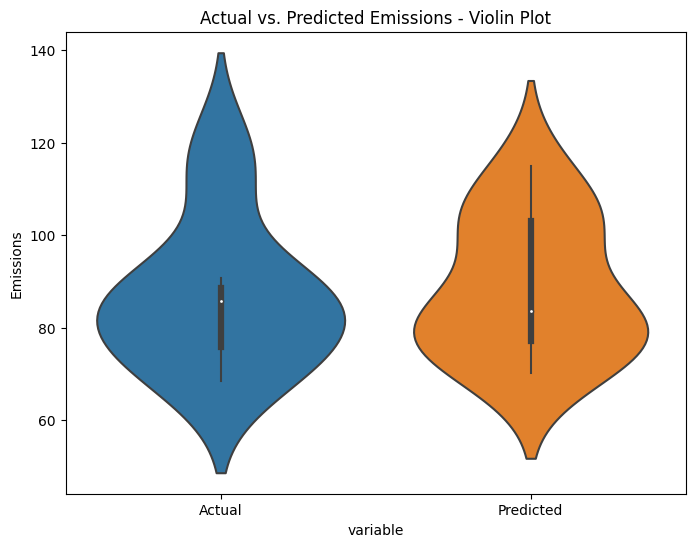

In [39]:
plt.figure(figsize=(8, 6))

sns.violinplot(x='variable', y='value', data=results_df.melt())

plt.ylabel('Emissions')
plt.title('Actual vs. Predicted Emissions - Violin Plot')
plt.xticks([0, 1], ['Actual', 'Predicted'])

plt.show()

In [40]:

mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 17.47188551938866
Root Mean Square Error (RMSE): 20.349790712254087
R-squared (R2): -0.7952372580993932


#### Conclusion
##### Based on these scores, there is room for improvement in the prediction performance, especially the negative R-squared value.